In [7]:
from matplotlib import rc
# rc('text', usetex=True)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

In [8]:
df = pd.read_csv('train-ablation-test.csv')
df.columns

Index(['Step', 'deep-forest-35 - dataset_stats.S100_N30_m3_full.gap_mean',
       'deep-forest-35 - dataset_stats.S100_N30_m3_full.gap_mean__MIN',
       'deep-forest-35 - dataset_stats.S100_N30_m3_full.gap_mean__MAX',
       'misunderstood-river-34 - dataset_stats.S100_N30_m3_full.gap_mean',
       'misunderstood-river-34 - dataset_stats.S100_N30_m3_full.gap_mean__MIN',
       'misunderstood-river-34 - dataset_stats.S100_N30_m3_full.gap_mean__MAX',
       'ethereal-eon-32 - dataset_stats.S100_N30_m3_full.gap_mean',
       'ethereal-eon-32 - dataset_stats.S100_N30_m3_full.gap_mean__MIN',
       'ethereal-eon-32 - dataset_stats.S100_N30_m3_full.gap_mean__MAX',
       'worthy-tree-28 - dataset_stats.S100_N30_m3_full.gap_mean',
       'worthy-tree-28 - dataset_stats.S100_N30_m3_full.gap_mean__MIN',
       'worthy-tree-28 - dataset_stats.S100_N30_m3_full.gap_mean__MAX'],
      dtype='object')

In [9]:
shitty_one = df['deep-forest-35 - dataset_stats.S100_N30_m3_full.gap_mean'].tolist()[:250]
mm = df['misunderstood-river-34 - dataset_stats.S100_N30_m3_full.gap_mean'].tolist()[:250]
okay = df['worthy-tree-28 - dataset_stats.S100_N30_m3_full.gap_mean'].tolist()[:250]

NameError: name 'mm_perf' is not defined

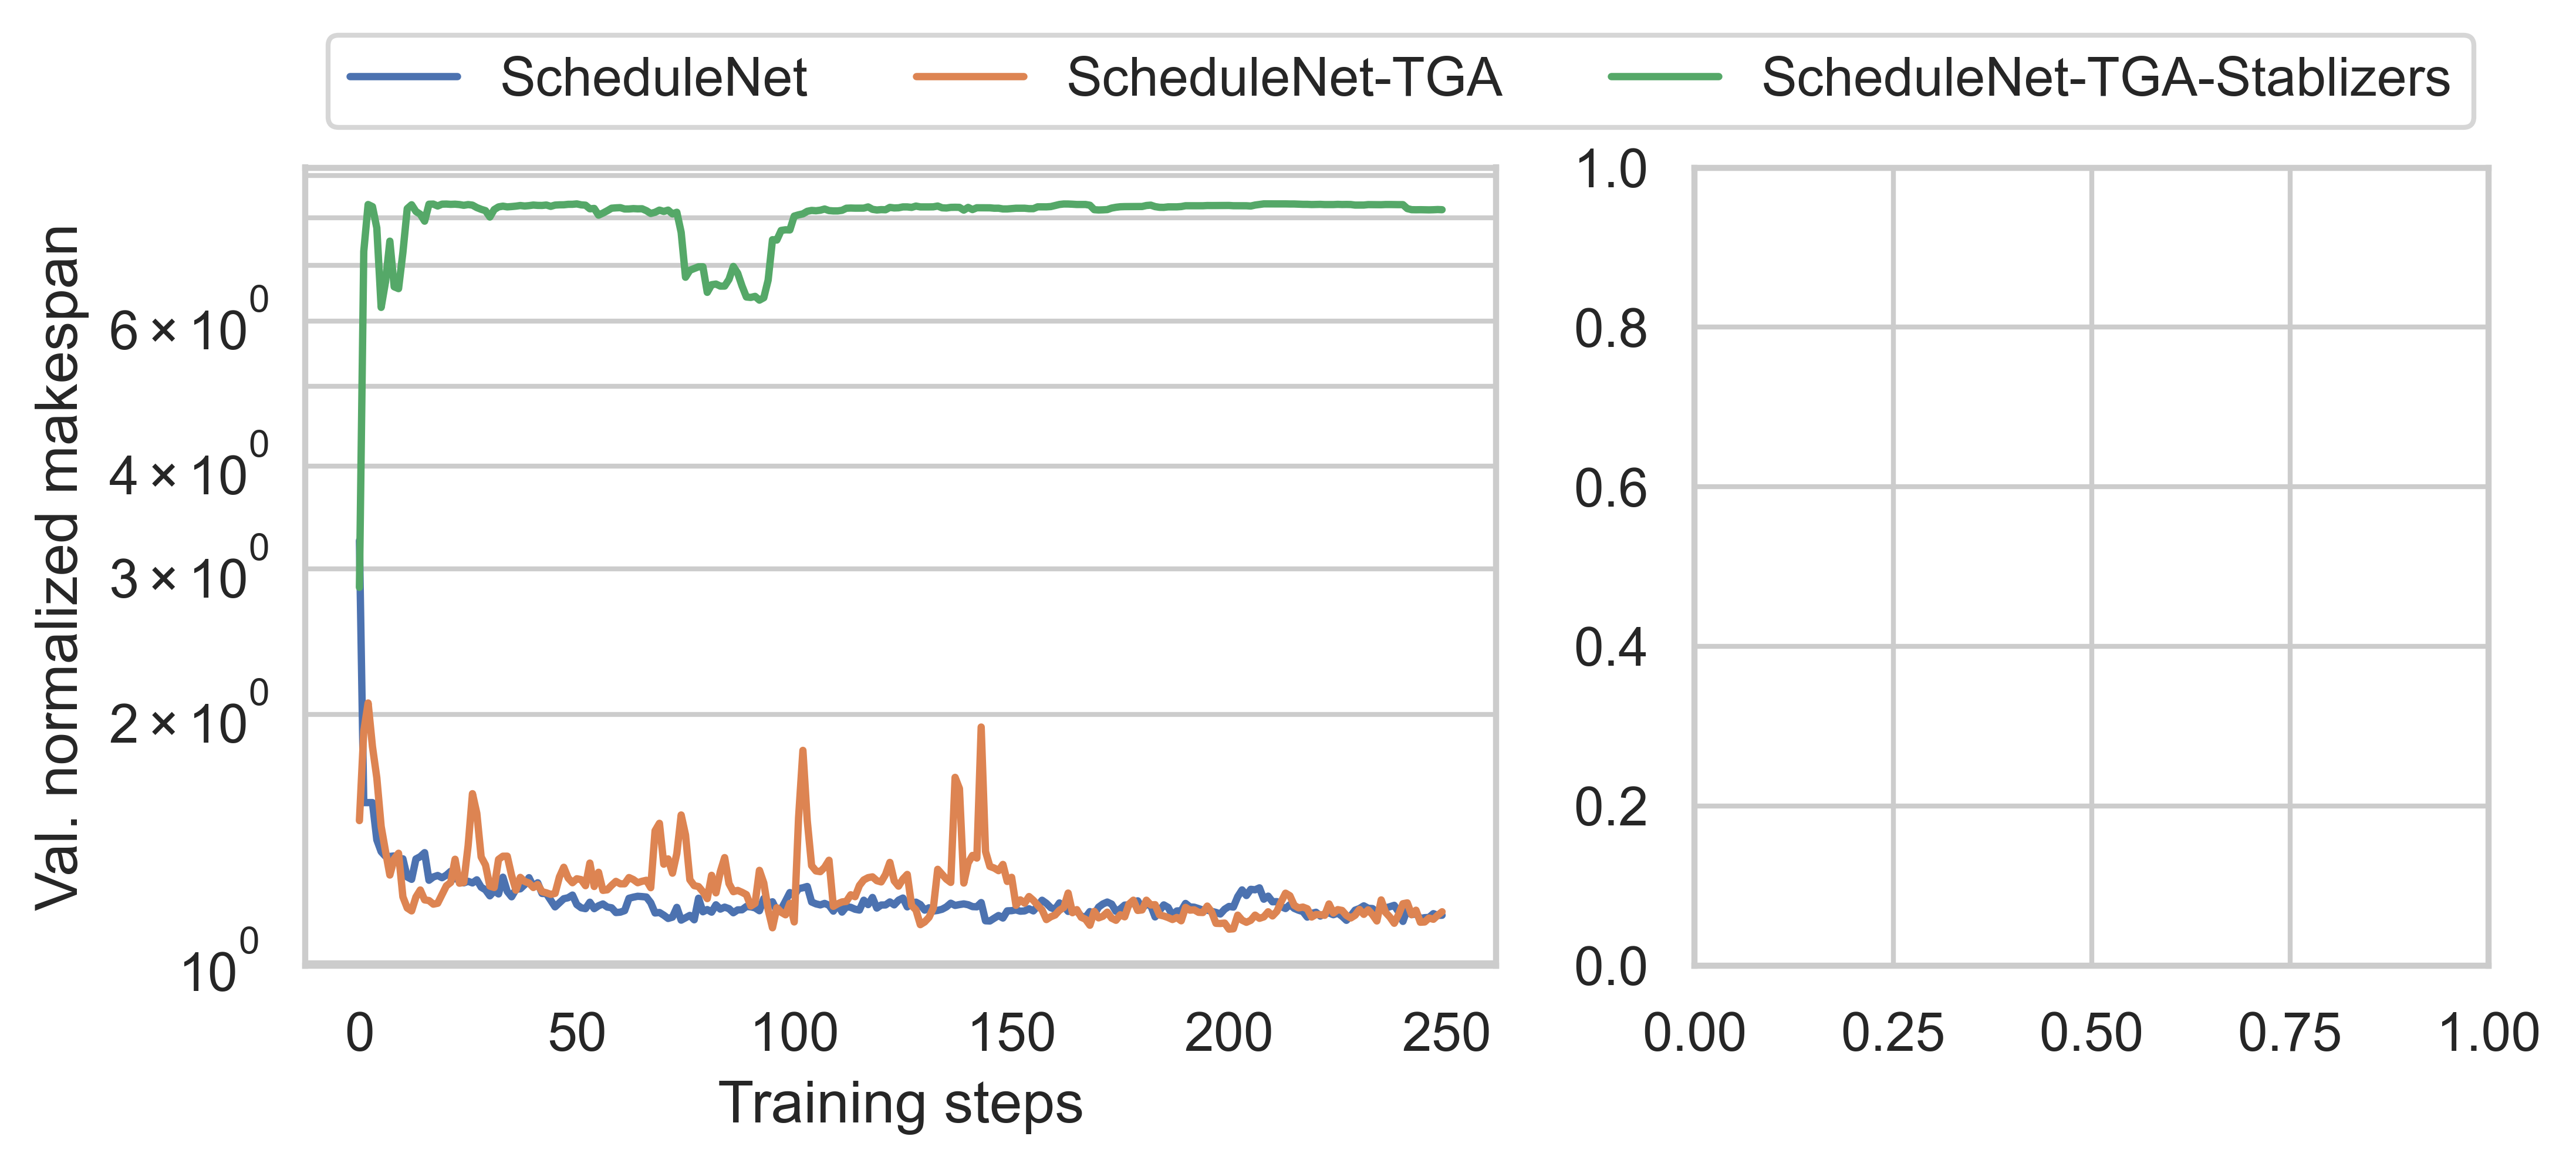

In [10]:
t = np.arange(len(shitty_one))

fig, axes = plt.subplots(1,2, figsize=(8,3), gridspec_kw={'width_ratios':[0.6, 0.4]}, dpi=600)

ax = axes[0]
ax.plot(t, mm, '-', label='ScheduleNet')
ax.plot(t, okay, '-', label='ScheduleNet-TGA')
ax.plot(t, shitty_one, '-', label='ScheduleNet-TGA-Stablizers')
ax.yaxis.grid(True, which='minor')

ax.set_yscale('log')
ax.set_xlabel('Training steps')
ax.set_ylabel('Val. normalized makespan')
ax.grid(axis='x')

ax.legend(ncol=3, bbox_to_anchor=(0.92,1.2), loc='upper center')   
# ax.set_title('Training Curves')

ax = axes[1]
mm_bars = ax.bar(np.arange(6) - bar_width/2, mm_perf, bar_width, color='b', label='ScheduleNet')
okay_bars = ax.bar(np.arange(6) + bar_width/2, okay_perf, bar_width, color='orange', label='ScheduleNet-TGA')
ax.set_xticks(np.arange(6))
ax.set_xticklabels(sizes, rotation=40)
# ax.legend()

ax.set_ylim(2.0, 2.7)
ax.set_ylabel('makespan')

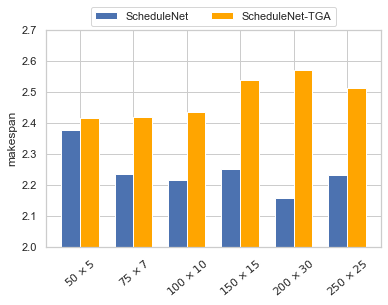

In [14]:
sizes = [r'$50\times5$', r'$75\times7$', r'$100\times10$', r'$150\times15$', r'$200\times30$', r'$250\times25$']
bar_width = 0.35
mm_perf = [2.375708, 2.235567, 2.216094, 2.251764, 2.15679, 2.23078]
okay_perf = [2.415008, 2.417829, 2.433898, 2.539378, 2.570651, 2.511318]
fig, ax = plt.subplots(1,1)
mm_bars = ax.bar(np.arange(6) - bar_width/2, mm_perf, bar_width, color='b', label='ScheduleNet')
okay_bars = ax.bar(np.arange(6) + bar_width/2, okay_perf, bar_width, color='orange', label='ScheduleNet-TGA')
ax.set_xticks(np.arange(6))
ax.set_xticklabels(sizes, rotation=40)
ax.legend()

ax.set_ylim(2.0, 2.7)
ax.set_ylabel('makespan')
ax.legend(ncol=2, bbox_to_anchor=(0.5, 1.13), loc='upper center')   